In [1]:
import pandas as pd

In [2]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt

In [49]:
%matplotlib inline

In [25]:
import statsmodels.formula.api as smf

In [26]:
import statsmodels.api as sm

## Load and Overview loansData.csv

In [8]:
df = pd.read_csv('loansData.csv')

In [10]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [11]:
df['Home.Ownership'].value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [15]:
df[df['Home.Ownership'] =='NONE'].shape

(1, 14)

## Add dummies to df as representation of the catagorical variable 'Home.Ownership'

In [16]:
dummies = pd.get_dummies(df['Home.Ownership'])

In [17]:
dummies.head()

,MORTGAGE,NONE,OTHER,OWN,RENT
81174,1.0,0.0,0.0,0.0,0.0
99592,1.0,0.0,0.0,0.0,0.0
80059,1.0,0.0,0.0,0.0,0.0
15825,1.0,0.0,0.0,0.0,0.0
33182,0.0,0.0,0.0,0.0,1.0


In [18]:
df = df.join(dummies)

In [19]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,MORTGAGE,NONE,OTHER,OWN,RENT
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,1.0,0.0,0.0,0.0,0.0
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,1.0,0.0,0.0,0.0,0.0
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,1.0,0.0,0.0,0.0,0.0
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,1.0,0.0,0.0,0.0,0.0
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,0.0,0.0,0.0,0.0,1.0


## Linear Regression to correlate Interest.Rate with Monthly.Income

First of all, we need to transform 'Interest.Rate' to numerical variable.
Then, we apply the linear model on dependent variable 'Interest.Rate' and predictor variable 'Monthly.Income'. The result shows there is nearly no correlation between them. The scatter plot shows the same.

In [20]:
df['Interest.Rate'] = df['Interest.Rate'].map(lambda x: np.float(x.rstrip('%')))

In [37]:
df['Monthly.Income'].shape

(2500,)

In [52]:
ls = smf.ols(formula = "Q('Interest.Rate') ~ Q('Monthly.Income')",data = df).fit()

In [53]:
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Interest.Rate')   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3764
Date:                Tue, 26 Jul 2016   Prob (F-statistic):              0.540
Time:                        15:35:04   Log-Likelihood:                -7118.1
No. Observations:                2499   AIC:                         1.424e+04
Df Residuals:                    2497   BIC:                         1.425e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              12.9956      0.146     88.868      0.000        12.709    13.282
Q('Monthly.Income')  1.294e-05   2.11e-05      0.614      0.540     -2.84e-05  5.43e-05
==============================================================================
Omnibus:                       69.811   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.205
Skew:                           0.274   Prob(JB):                     1.70e-12
Kurtosis:                       2.531   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

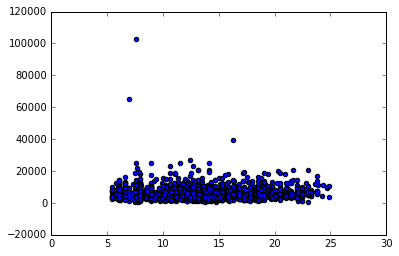

In [50]:
plt.scatter(df['Interest.Rate'],df['Monthly.Income'])

## Our next thing to try is to add dummies of the catagorical variable 'Home.Ownership' to the model. See if we can improve the result.

The result shows a R-squared value of 0.008 which still shows no correlation. Thus, the significance of the correlation does not improve much after adding the 'Home.Ownership' into consideration.

In [61]:
ls = smf.ols(formula = "Q('Interest.Rate') ~Q('Monthly.Income') + Q('MORTGAGE') + Q('OTHER') + Q('OWN') + Q('RENT')",data = df).fit()

In [62]:
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Interest.Rate')   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.956
Date:                Tue, 26 Jul 2016   Prob (F-statistic):           0.000558
Time:                        15:43:50   Log-Likelihood:                -7108.4
No. Observations:                2499   AIC:                         1.423e+04
Df Residuals:                    2494   BIC:                         1.426e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              10.8859      0.390     27.894      0.000        10.121    11.651
Q('Monthly.Income')  3.059e-05   2.15e-05      1.420      0.156     -1.17e-05  7.28e-05
Q('MORTGAGE')           1.6524      0.393      4.199      0.000         0.881     2.424
Q('OTHER')              4.9817      1.492      3.340      0.001         2.057     7.907
Q('OWN')                1.8742      0.442      4.239      0.000         1.007     2.741
Q('RENT')               2.3775      0.391      6.086      0.000         1.611     3.144
==============================================================================
Omnibus:                       68.355   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.127
Skew:                           0.285   Prob(JB):                     1.07e-12
Kurtosis:                       2.549   Cond. No.                     3.56e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.5e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Try adding interaction term of 'Monthly.Income' and 'Home.Ownership'

Not sure how to do this as the catagorical variable 'Home.Ownership' has been converted into multiple binary variables and an interaction term may not apply.